# Exploratory Analysis

### Summary of WorkForce database for project

##### Number of records, employees and time period

In [1]:
%%bq query
#Number of records in database
SELECT COUNT(*) AS num_records, COUNT(DISTINCT emp_id) as num_employees, MIN(effective_dt) as earliest_date, MAX(effective_dt) as latest_date
FROM `w210-fedwork.processed_data.dynamic`


num_records,num_employees,earliest_date,latest_date
7441649,3871680,1998-03-26,2014-06-30


##### Per Year

In [10]:
%%bq query

SELECT year_eff_dt
  ,COUNT(DISTINCT emp_id) as num_emp_ids  # number of employees with a changed in their job per year
  ,COUNT(*) as num_records    # number of personal actions recorded per year
FROM `w210-fedwork.processed_data.dynamic`
GROUP BY year_eff_dt
ORDER BY year_eff_dt

year_eff_dt,num_emp_ids,num_records
1998,320,328
1999,4713,4968
2000,365974,481588
2001,368521,483725
2002,426396,540275
2003,508981,788030
2004,384060,485110
2005,388632,488732
2006,385340,481285
2007,410979,516972


In [8]:
%%bq query --name num_emp_year

SELECT year_eff_dt
  ,COUNT(DISTINCT emp_id) as num_emp_ids  # number of employees with a changed in their job per year
  ,COUNT(*) as num_records    # number of personal actions recorded per year
FROM `w210-fedwork.processed_data.dynamic`
GROUP BY year_eff_dt
ORDER BY year_eff_dt

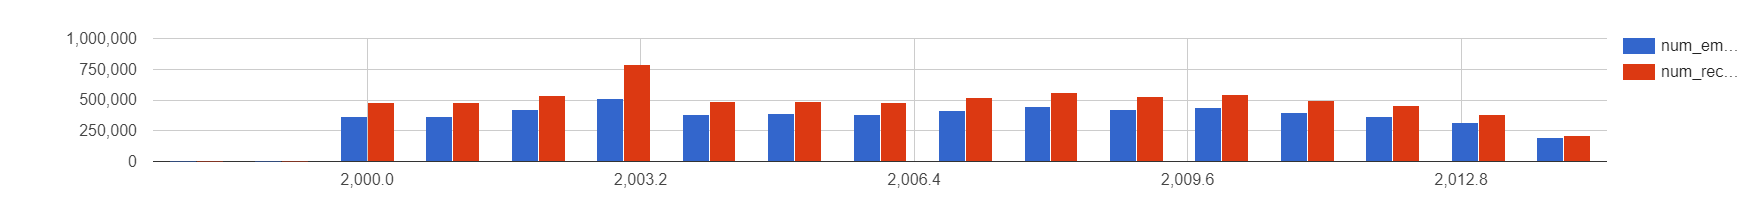

In [9]:
%chart columns --data num_emp_year --fields year_eff_dt,num_emp_ids,num_records

#### Conclusion:
* There are very few records for years 1998 and 1999. These could potentially be eliminated from the analysis
* There is a significant increase in the number of personel actions in year 2003


### Analysis of variable ACCES_SEP_IND

ACCES_SEP_IND: A personnel action resulting in the addition of an employee to an agency’s staff or the loss of an employee from an agency’s staff.


| Accessions/Separations Code        | Description           |
| ------------- |:--------------|
|AA             |Transfer In - Individual Transfer|
|AB             |Transfer In - Mass Transfer|
|AC             |New Hire - Competitive Service Appointment|
|AD             |New Hire - Excepted Service Appointment|
|AE             |New Hire - Senior Executive Service (SES) Appt|
|SA             |Transfer Out - Individual Transfer|
|SB             |Transfer Out - Mass Transfer|
|SC             |Quit|
|SD             |Retirement - Voluntary|
|SE             |Retirement - Early Out|
|SF             |Retirement - Disability|
|SG             |Retirement - Other|
|SH             |Reduction In Force (RIF)|
|SI             |Termination or Removal (Discipline/Performance)|
|SJ             |Termination (Expired Appt/Other)|
|SK             |Death|
|SL             |Other Separation|


In [12]:
%%bq query

SELECT AVG(num_changes) as avg_num_changes
       ,APPROX_QUANTILES(num_changes,2) as quantiles_num_changes
FROM (
SELECT emp_id, COUNT(DISTINCT acces_sep_ind) as num_changes
FROM `w210-fedwork.processed_data.dynamic`
GROUP BY emp_id
  ) as a

avg_num_changes,quantiles_num_changes
1.62233113274,"[1, 1, 9]"


In the time period 1998-2014, the averge num of personel actions per employee is **avg=1.62, median=1**

##### Distribution of personel actions 

In [16]:
%%bq query --name dist_acces_ind

SELECT acces_sep_ind, COUNT(*) as num_actions
FROM `w210-fedwork.processed_data.dynamic`
GROUP BY acces_sep_ind
ORDER BY acces_sep_ind

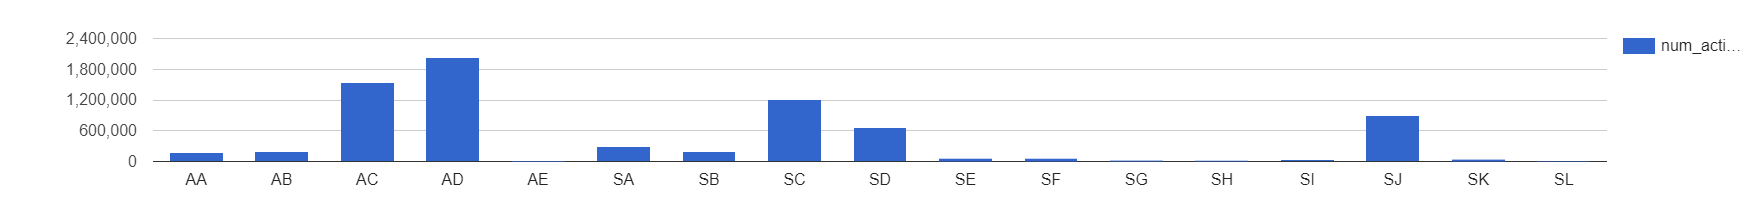

In [17]:
%chart columns --data dist_acces_ind --fields acces_sep_ind,num_actions

There are more hires than terminations (voluntary, retirements or disciplined). This is consistent with the documentation of the dataset: 

"Employees in the following situations are counted as new hires rather than
transfers-in:

1. Employees who moved from an Excepted Service position.
2. Employees who moved from one type of Federal service to another (e.g., left a
Competitive Service position in one agency to take an Excepted or Senior Executive
Service position at another agency).

As a result from (a) and (b) above, the transfer-in count in the accession cube will
usually be lower than the transfer-out count in the separation cube."



**Conclusion:**
Most employees have one action personel in the dataset. For most employees this action is a "hire" or "termination" (quit, voluntary retirement). 



### Length of Service (LOS)

In [6]:
%%bq query --name los_summary

SELECT los, COUNT(*) as num_records
FROM `w210-fedwork.processed_data.dynamic`
GROUP BY los
ORDER BY num_records

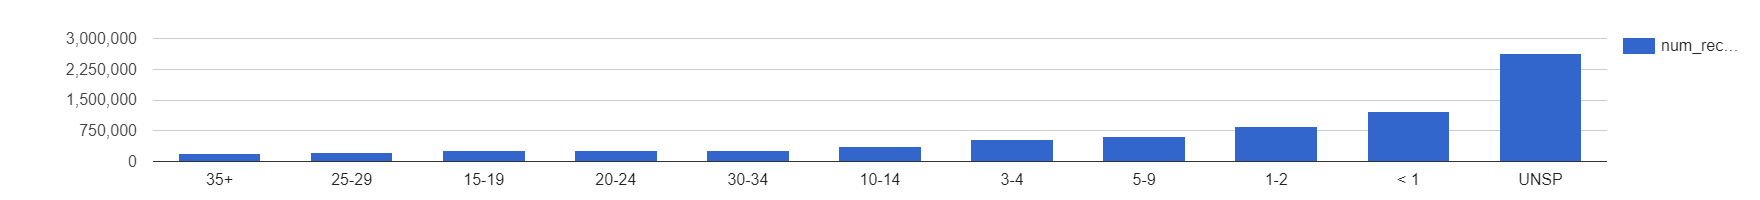

In [7]:
%chart columns --data los_summary --fields los,num_records

In [16]:
%%bq query 

SELECT 
  acces_sep_ind, 
  MAX(IF(los = "UNSP", num_records, NULL)) AS UNSP,
  MAX(IF(los = "< 1", num_records, NULL)) AS less_than_1,
  MAX(IF(los = "1-2", num_records, NULL)) AS between_1_2,
  MAX(IF(los = "3-4", num_records, NULL)) AS between_3_4,
  MAX(IF(los = "5-9", num_records, NULL)) AS between_5_9,
  MAX(IF(los = "10-14", num_records, NULL)) AS between_10_14,
  MAX(IF(los = "15-19", num_records, NULL)) AS between_15_19,
  MAX(IF(los = "20-24", num_records, NULL)) AS between_20_24,
  MAX(IF(los = "25-29", num_records, NULL)) AS between_25_29,
  MAX(IF(los = "30-24", num_records, NULL)) AS between_30_34,
  MAX(IF(los = "35+", num_records, NULL)) AS greater_than_35
FROM (
    SELECT acces_sep_ind, los, COUNT(*) as num_records
    FROM `w210-fedwork.processed_data.dynamic`
    GROUP BY acces_sep_ind, los
    ORDER BY acces_sep_ind, num_records)
GROUP BY acces_sep_ind 
ORDER BY acces_sep_ind

acces_sep_ind,UNSP,less_than_1,between_1_2,between_3_4,between_5_9,between_10_14,between_15_19,between_20_24,between_25_29,between_30_34,greater_than_35
AA,2590,3019,15283,18051,36623,29790,27501,23164,14788,,1234
AB,291,63612,23027,17892,22711,18393,15265,10000,8198,,1686
AC,964844,96621,130333,121870,124275,53431,24361,13223,7634,,6637
AD,1587305,131580,96899,78842,72469,28595,12693,7277,4324,,1598
AE,2589,74,234,252,478,331,325,314,253,,82
SA,653,13398,38433,35002,62954,44498,37358,29582,18347,,1520
SB,975,64854,22628,17963,23108,18901,15639,10284,8415,,1742
SC,37549,421376,287565,144688,165347,74795,39020,20778,8723,,2954
SD,131,52,161,404,21695,38396,48014,95017,92246,,171953
SE,8,2,3,7,88,322,680,17037,30456,,3026


**Conclusion:**

Observations:

1. The majority of UNSP length of service are for new hires.
2. The majority of employees with LOS between 0-14 quit, terminated their job or are new hires.
3. The majority of employees with LOS between greater than 15 quit, or terminated their job in some way.

As we observed before, there are employees marked as new hires with LOS > 0. These employees must be transfers from other agencies who were marked as new hires.



#### Age Category


In [19]:
%%bq query --name age_counts

SELECT age, COUNT(*) as num_records 
FROM `w210-fedwork.processed_data.dynamic`
GROUP BY age
ORDER BY age



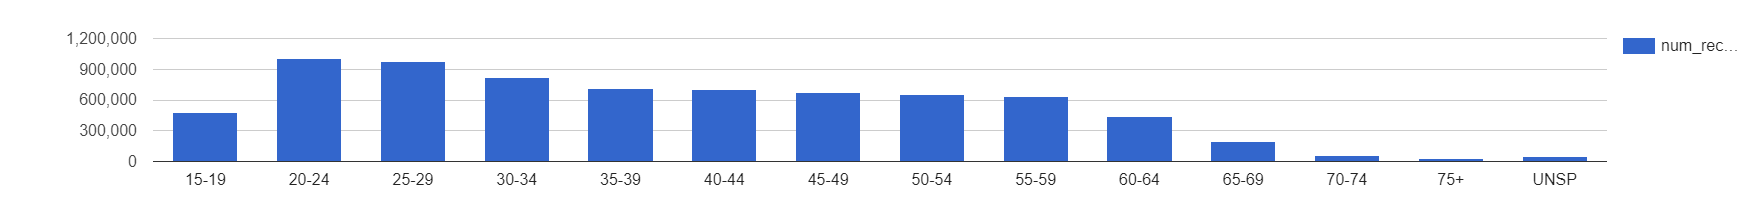

In [20]:
%chart columns --data age_counts --fields age,num_records

** Comments: **
1. Most employees are between 20-29 years old
2. A small fraction of records do not have age specified. **Need to investigate if these employees have a second record with age recorded.**

#### Pay Plan and Grade


In [21]:
%%bq query --name pay_plan

SELECT pay_plan, COUNT(*) as num_records 
FROM `w210-fedwork.processed_data.dynamic`
GROUP BY pay_plan
ORDER BY pay_plan

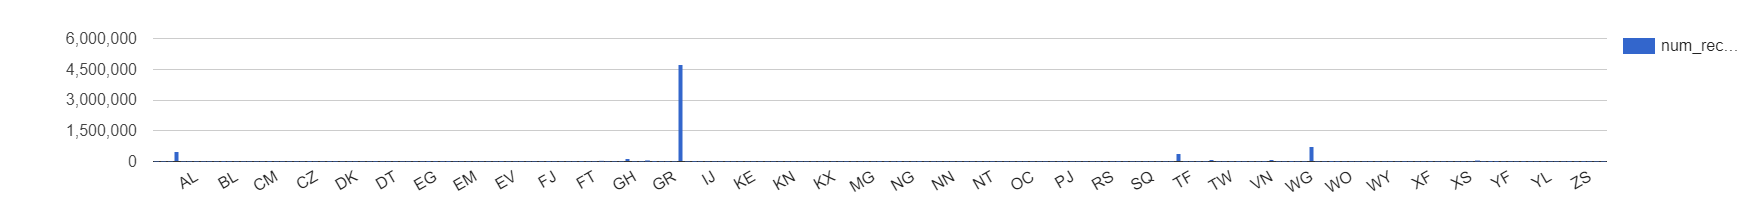

In [23]:
%chart columns --data pay_plan --fields pay_plan,num_records

The top pay plan categories are


In [16]:
%%bq query --name top_pay_plans


SELECT pay_plan, num_records, user_rank
FROM (
    SELECT pay_plan
          ,num_records
          ,RANK() 
            OVER (
            ORDER BY num_records DESC) AS user_rank
    FROM (
          SELECT pay_plan, COUNT(*) as num_records 
          FROM `w210-fedwork.processed_data.dynamic`
          GROUP BY pay_plan
         )
    )
WHERE user_rank <=15

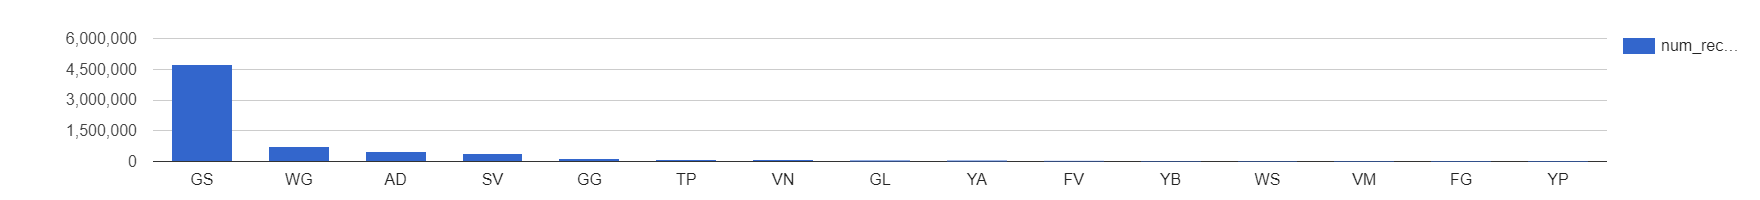

In [17]:
%chart columns --data top_pay_plans --fields pay_plan,num_records

In [20]:
%%bq query 


SELECT grade, num_records, user_rank
FROM (
    SELECT grade
          ,num_records
          ,RANK() 
            OVER (
            ORDER BY num_records DESC) AS user_rank
    FROM (
          SELECT grade, COUNT(*) as num_records 
          FROM `w210-fedwork.processed_data.dynamic`
          GROUP BY grade
         )
    )
--WHERE user_rank <=15

grade,num_records,user_rank
05,940173,1
04,889250,2
03,655332,3
07,570001,4
02,446874,5
11,444225,6
00,443767,7
09,421016,8
12,418221,9
01,355491,10


In [33]:
%%bq query --name type_appointment



    SELECT type_appoint
          ,num_records
          ,RANK() 
            OVER (
            ORDER BY num_records DESC) AS user_rank
    FROM (
          SELECT type_appoint, COUNT(*) as num_records 
          FROM `w210-fedwork.processed_data.dynamic`
          GROUP BY type_appoint
         )


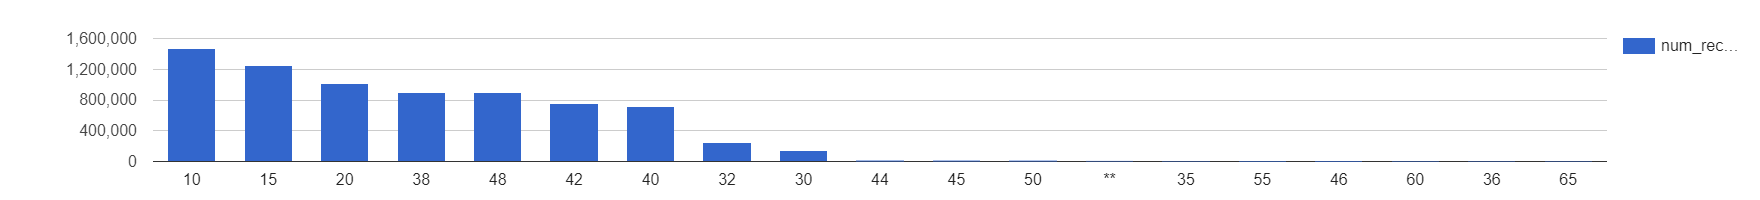

In [34]:
%chart columns --data type_appointment --fields type_appoint,num_records

### Wrk Schedule

In [35]:
%%bq query 



    SELECT work_schedule
          ,num_records
          ,RANK() 
            OVER (
            ORDER BY num_records DESC) AS user_rank
    FROM (
          SELECT work_schedule, COUNT(*) as num_records 
          FROM `w210-fedwork.processed_data.dynamic`
          GROUP BY work_schedule
         )

work_schedule,num_records,user_rank
F,5730466,1
P,581371,2
I,570596,3
G,401440,4
J,93332,5
Q,61248,6
S,2150,7
*,984,8
,30,9
T,24,10


| Work Schedule Code  |Work Schedule Translation     |
| ------------------ |:----------------------|
|                    |No Data Reported|                                                        
|B                   |BAYLOR PLAN|                                                              
|F                   |FULL-TIME|                                                               
|G                   |FULL-TIME SEASONAL|                                                        
|I                   |INTERMITTENT|                                                            
|J                   |INTERMITTENT SEASONAL|                                                      
|P                   |PART-TIME|                                                            
|Q                   |PART-TIME SEASONAL|                                                         
|R                   |A SCHEDULE REQUIRED WHEN AN EMPLOYEE HAS ELECTED PHASED EMPLOYMENT/PHASED RE|
|S                   |PART-TIME JOB SHARER|                                                  
|T                   |PART-TIME SEASONAL JOB SHARER|    


One comment in the documentations reads the following:

"A combination of Type of Appointment and Work Schedule dimensions. The Work Status
dimension is limited to "Non-Seasonal Full Time Permanent" and "Other Employees". "

### Basic Pay (Salary)

In [26]:
%%bq query

SELECT AVG(basic_pay) as avg_pay, MIN(basic_pay) as min_pay, MAX(basic_pay) as max_pay, STDDEV(basic_pay) as std_pay, VAR_SAMP(basic_pay) as var_pay
FROM `w210-fedwork.processed_data.dynamic`

avg_pay,min_pay,max_pay,std_pay,var_pay
46141.3253348,0,385980,30214.0021348,912885925.0


In [30]:
%%bq query

SELECT COUNT(basic_pay) as num_records
FROM `w210-fedwork.processed_data.dynamic`
where basic_pay=0 or  basic_pay is null

num_records
11504


There is a very small fraction of records with no payment information.

In [37]:
%%bq query

SELECT nsftp_ind, COUNT(*) as num_records 
FROM `w210-fedwork.processed_data.status`
GROUP BY nsftp_ind


nsftp_ind,num_records
1,95749245
2,14548158


In [40]:
%%bq query --name education_level



    SELECT education_level
          ,num_records
          ,RANK() 
            OVER (
            ORDER BY num_records DESC) AS user_rank
    FROM (
          SELECT education_level, COUNT(*) as num_records 
          FROM `w210-fedwork.processed_data.status`
          GROUP BY education_level
         )

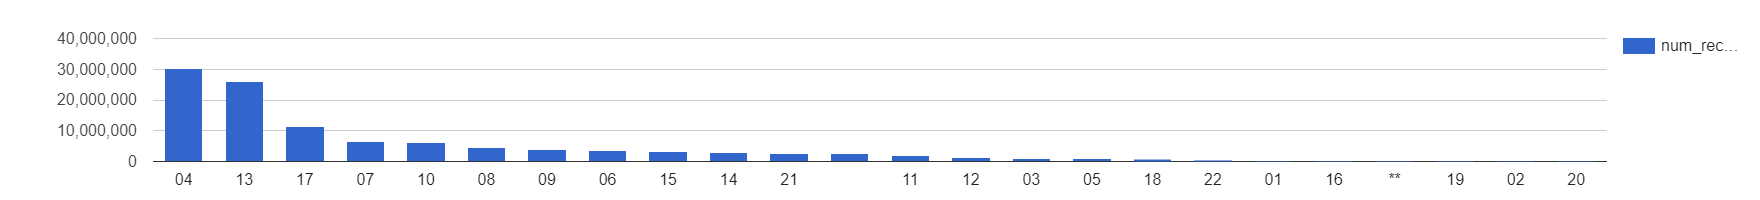

In [41]:
%chart columns --data education_level --fields education_level,num_records

Ed. Level Code           Education Level Translation
                          -No Data Reported                                                            
*                        *-Invalid                                                                     
01                       01-NO FORMAL EDUCATION OR SOME ELEMENTARY SCHOOL - DID NOT COMPLETE           
02                       02-ELEMENTARY SCHOOL COMPLETED - NO HIGH SCHOOL                               
03                       03-SOME HIGH SCHOOL - DID NOT COMPLETE                                        
04                       04-HIGH SCHOOL GRADUATE OR CERTIFICATE OF EQUIVALENCY                         
05                       05-TERMINAL OCCUPATIONAL PROGRAM - DID NOT COMPLETE                           
06                       06-TERMINAL OCCUPATIONAL PROGRAM - CERTIFICATE OF COMPLETION, DIPLOMA OR EQUIV                  
07                       07-SOME COLLEGE - LESS THAN ONE YEAR                                          
08                       08-ONE YEAR COLLEGE                                                           
09                       09-TWO YEARS COLLEGE                                                          
10                       10-ASSOCIATE DEGREE                                                           
11                       11-THREE YEARS COLLEGE                                                        
12                       12-FOUR YEARS COLLEGE                                                         
13                       13-BACHELOR'S DEGREE                                                          
14                       14-POST-BACHELOR'S                                                            
15                       15-FIRST PROFESSIONAL                                                         
16                       16-POST-FIRST PROFESSIONAL                                                    
17                       17-MASTER'S DEGREE                                                            
18                       18-POST-MASTER'S                                                              
19                       19-SIXTH-YEAR DEGREE                                                          
20                       20-POST-SIXTH YEAR                                                            
21                       21-DOCTORATE DEGREE                                                           
22                       22-POST-DOCTORATE     

In [21]:
import google.datalab.ml as ml
import json
import math
import matplotlib.pyplot as plot
import mltoolbox.regression.dnn as regression
import numpy as np
import pandas as pd
import os
import seaborn as sns
import sklearn.metrics as metrics

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
workspace_path = '/content/datalab/workspace/exploration'

#### The following sample dataset contains 30,000 rows

In [28]:
df_data = pd.read_csv(os.path.join(workspace_path, 'data/sample_dynamic.csv'), dtype=str)
print '%d rows' % len(df_data)
df_data.head()

30000 rows


,emp_id,agency,acces_sep_ind,effective_dt,age,pay_plan,grade,los,duty_station,occupation,occupation_cat,basic_pay,type_appoint,work_schedule,dod_ind,year_eff_dt,month_eff_dt,day_eff_dt,quarter_eff_dt,week_eff_dt
0,001731070,DD34,SC,2010-01-01,20-24,YB,01,1-2,#########,****,*,21517,40,F,1,2010,1,1,1,0
1,002741047,NV24,SD,2010-01-02,50-54,**,**,35+,#########,****,*,NaN,10,F,1,2010,1,2,1,0
2,004045502,NV19,SD,2010-01-02,60-64,**,**,35+,#########,****,*,NaN,10,G,1,2010,1,2,1,0
3,009203122,NV27,SJ,2010-01-07,25-29,**,**,3-4,#########,****,*,NaN,20,P,1,2010,1,7,1,1
4,008030594,NV27,SC,2010-01-08,50-54,**,**,< 1,#########,****,*,NaN,15,F,1,2010,1,8,1,1


Remove Duplicates

In [29]:
df_data2 = df_data[['emp_id','effective_dt']].groupby(['emp_id'], as_index=False).count()
df_data2.rename(columns={'effective_dt':'num_records'}, inplace=True)
duplicates=df_data2[df_data2['num_records']>=2].emp_id.tolist()
df_data=df_data[~df_data['emp_id'].isin(duplicates)]

In [30]:
# This code is packaged as a function that can be reused if you need to apply to future
# datasets, esp. to prediction data, to ensure consistent transformations are applied.

def transform_data(df):
  
 
  
  #interesting_columns = ['emp_id','age','basic_pay', 'dod_ind', 'pay_plan', 'grade','los', 'occupation_cat', 'acces_sep_ind']
  #df = df[interesting_columns]
  
  # Replace whitespace with NaN, and NaNs with empty string
  df = df.replace('\s+', np.nan, regex=True).fillna('')

  # Filter out the rows without an income, i.e. there is no target value to learn from
  df = df[df.basic_pay != '']

  
  # Convert the wage value into units of 1000. So someone making an income from wages
  # of $23200 will have it encoded as 23.2
  df['basic_pay'] = df.basic_pay.astype(np.int64) / 1000.0

  df['quit']= df.acces_sep_ind =='SC'
  df['quit']= df.quit.astype(np.int64)
  return df

In [31]:
df_data = transform_data(df_data)
print '%d rows' % len(df_data)
df_data.head()

28718 rows


,emp_id,agency,acces_sep_ind,effective_dt,age,pay_plan,grade,los,duty_station,occupation,...,basic_pay,type_appoint,work_schedule,dod_ind,year_eff_dt,month_eff_dt,day_eff_dt,quarter_eff_dt,week_eff_dt,quit
0,001731070,DD34,SC,2010-01-01,20-24,YB,01,1-2,#########,****,...,21.517,40,F,1,2010,1,1,1,0,1
9,001150242,ARHR,AD,2000-12-31,50-54,GS,12,10-14,#########,****,...,58.124,38,F,1,2000,12,31,4,53,0
10,004432817,AF1M,SD,2000-12-31,60-64,WG,10,20-24,#########,****,...,41.490,10,F,1,2000,12,31,4,53,0
11,004920194,ARMC,AD,2008-01-07,40-44,YB,01,1-2,#########,****,...,27.480,40,F,1,2008,1,7,1,1,0
12,002593889,ARCE,AC,2001-01-08,40-44,WB,00,3-4,#########,****,...,63.236,15,F,1,2001,1,8,1,1,0


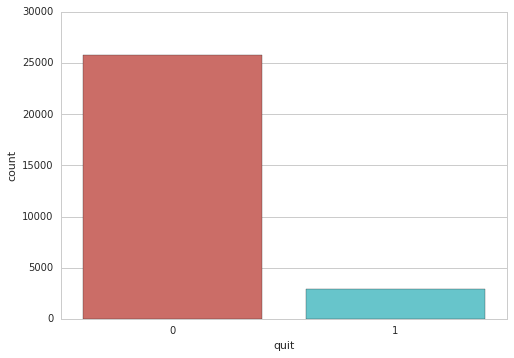

In [15]:
sns.countplot(x='quit', data=df_data, palette='hls')
plot.show()

In [17]:
df_data.isnull().sum()

emp_id            0
age               0
basic_pay         0
dod_ind           0
pay_plan          0
grade             0
los               0
occupation_cat    0
acces_sep_ind     0
quit              0
dtype: int64

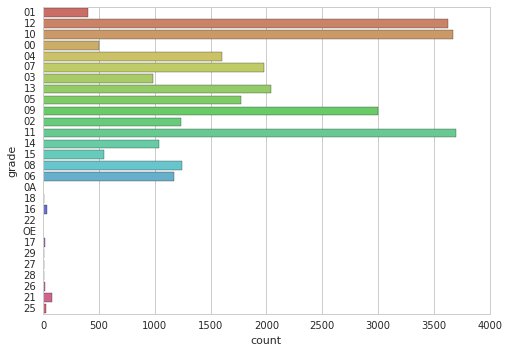

In [19]:
sns.countplot(y='grade', data=df_data, palette='hls')
plot.show()

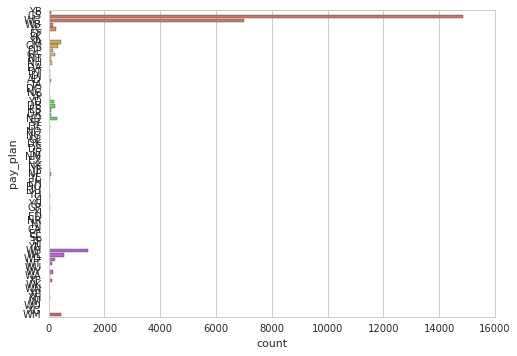

In [20]:
sns.countplot(y='pay_plan', data=df_data, palette='hls')
plot.show()

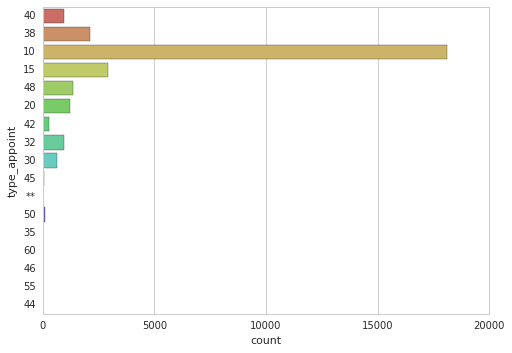

In [32]:
sns.countplot(y='type_appoint', data=df_data, palette='hls')
plot.show()